In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
# Load and preprocess our data
skills_df = pd.read_csv("C:\\Users\\Selvakumar\\Desktop\\jd.csv")
salary_df = pd.read_csv("C:\\Users\\Selvakumar\\Desktop\\js.csv")

# Remove 'L' and multiply by 100000 in the 'avg_salary' column   DATA CLEANING
salary_df['avg_salary'] = salary_df['avg_salary'].str.replace('L', '').astype(float) * 100000
salary_df['min_salary'] = salary_df['min_salary'].str.replace('L', '').astype(float) * 100000
salary_df['max_salary'] = salary_df['max_salary'].str.replace('L', '').astype(float) * 100000

# Merge datasets based on common feature    DATA CLEANING 
merged_df = pd.merge(skills_df, salary_df, on='Company', how='inner')
merged_df.drop(columns=['Unnamed: 0'], inplace=True)


merged_df.sample(5)
merged_df.isnull().sum()



Job_Role              0
Company               0
Location              0
Job Experience        0
Skills/Description    0
job_title             0
min_experience        0
avg_salary            0
min_salary            0
max_salary            0
num_of_salaries       0
dtype: int64

In [45]:

merged_df.shape[0]

15793

In [66]:
import pandas as pd

# Assuming your DataFrame is named df
df= merged_df

# Clean up the 'Location' column by removing leading and trailing spaces
df['Location'] = df['Location'].str.strip()

# Split the 'Location' column by comma as a delimiter
df['Location'] = df['Location'].str.split(',')

# Explode the DataFrame to create separate rows for each location
df = df.explode('Location')

# Update the index of the DataFrame
df.reset_index(drop=True, inplace=True)
df.shape[0]
df['Location'].unique()


array(['Bangalore/Bengaluru', 'Chennai', 'Noida', 'Bengaluru', 'Pune',
       'Mumbai', ' Pune', 'Chandigarh', 'Hyderabad/Secunderabad',
       'Gurgaon/Gurugram', ' Gurgaon/Gurugram', ' Bangalore/Bengaluru',
       'Kolkata', 'Ahmedabad', 'Kochi/Cochin', ' Bengaluru/Bangalore',
       'Mysore/Mysuru', 'Gurgaon Gurugram', 'Delhi / NCR', 'Delhi',
       ' Delhi / NCR', 'New Delhi', ' Hyderabad/Secunderabad', ' Chennai',
       ' Mumbai (All Areas)', 'Bangalore/Bengaluru(Whitefield)', 'Jaipur',
       'Coimbatore', ' Mumbai', ' Srinagar', ' Jaipur', ' Indore',
       ' Kolkata', ' Ahmedabad', ' New Delhi', 'Visakhapatnam',
       'Hyderabad', 'Kalyani', ' Nagar', ' United States (USA)',
       'Gurgaon', ' Coimbatore', ' Hyderabad', ' India',
       'Trivandrum/Thiruvananthapuram', 'Vadodara', ' Greater Noida',
       'Pune(Kharadi)', ' Ahmedabad(Prahlad Nagar)', 'Indore',
       'Mumbai(Sector 30A Vashi)', ' Mumbai Suburban', 'Japan',
       ' Gurgaon', ' Chenani', 'Tirunelveli', ' Navi

In [67]:
import pandas as pd

# Assuming your DataFrame is named df

# Clean up the 'Location' column by removing leading and trailing spaces
df['Location'] = df['Location'].str.strip()

location_mapping = {
    'Bangalore/Bengaluru': 'Bengaluru',
    'Chennai': 'Chennai',
    'Noida': 'Noida',
    'Bengaluru': 'Bengaluru',
    'Pune': 'Pune',
    'Mumbai': 'Mumbai',
    ' Pune': 'Pune',  # Note: Assuming this should be 'Pune' instead of ' Pune'
    'Chandigarh': 'Chandigarh',
    'Hyderabad/Secunderabad': 'Hyderabad',
    'Gurgaon/Gurugram': 'Gurgaon',
    ' Gurgaon/Gurugram': 'Gurgaon',
    ' Bangalore/Bengaluru': 'Bengaluru',
    'Kolkata': 'Kolkata',
    'Ahmedabad': 'Ahmedabad',
    'Kochi/Cochin': 'Kochi',
    ' Bengaluru/Bangalore': 'Bengaluru',
    'Mysore/Mysuru': 'Mysore',
    'Gurgaon Gurugram': 'Gurgaon',
    'Delhi / NCR': 'Delhi',
    'Delhi': 'Delhi',
    ' Delhi / NCR': 'Delhi',
    'New Delhi': 'New Delhi',
    ' Hyderabad/Secunderabad': 'Hyderabad',
    ' Chennai': 'Chennai',
    ' Mumbai (All Areas)': 'Mumbai',
    'Bangalore/Bengaluru(Whitefield)': 'Bengaluru',
    'Jaipur': 'Jaipur',
    'Coimbatore': 'Coimbatore',
    ' Mumbai': 'Mumbai',
    ' Srinagar': 'Srinagar',
    ' Jaipur': 'Jaipur',
    ' Indore': 'Indore',
    ' Kolkata': 'Kolkata',
    ' Ahmedabad': 'Ahmedabad',
    ' New Delhi': 'New Delhi',
    'Visakhapatnam': 'Visakhapatnam',
    'Hyderabad': 'Hyderabad',
    'Kalyani': 'Kalyani',
    ' Nagar': 'Nagar',
    ' United States (USA)': 'USA',
    'Gurgaon': 'Gurgaon',
    ' Coimbatore': 'Coimbatore',
    ' India': 'India',
    'Trivandrum/Thiruvananthapuram': 'Trivandrum',
    'Vadodara': 'Vadodara',
    ' Greater Noida': 'Greater Noida',
    'Pune(Kharadi)': 'Pune',
    ' Ahmedabad(Prahlad Nagar)': 'Ahmedabad',
    'Indore': 'Indore',
    'Mumbai(Sector 30A Vashi)': 'Mumbai',
    ' Mumbai Suburban': 'Mumbai',
    'Japan': 'Japan',
    ' Gurgaon': 'Gurgaon',
    ' Chenani': 'Chenani',
    'Tirunelveli': 'Tirunelveli',
    ' Navi Mumbai': 'Navi Mumbai',
    ' Bengaluru': 'Bengaluru',
    'Remote': 'Remote',
    ' Trivandrum/Thiruvananthapuram': 'Trivandrum',
    'New Delhi(Jasola)': 'New Delhi',
    ' Faridabad': 'Faridabad',
    'Gurgaon/Gurugram(Gwal Pahari)': 'Gurgaon',
    'Navi Mumbai': 'Navi Mumbai',
    'Ahmedabad(Prahlad Nagar)':'Ahmedabad',
    'Bengaluru/Bangalore': 'Bengaluru',
    'Chenani': 'Chennai',
    'Greater Noida': 'Noida',
    'Navi Mumbai': 'Mumbai',
    'Mumbai (All Areas)': 'Mumbai',
    'Mumbai Suburban': 'Mumbai',
    'United States (USA)': 'USA'
}


# Replace longer locations with their shortest form only if they are found in the mapping
df['Location'] = df['Location'].apply(lambda x: location_mapping.get(x, x))

# Now df contains the updated 'Location' column with shorter location values where applicable
unique_locations = df['Location'].unique()
print(unique_locations)

merged_df= df




['Bengaluru' 'Chennai' 'Noida' 'Pune' 'Mumbai' 'Chandigarh' 'Hyderabad'
 'Gurgaon' 'Kolkata' 'Ahmedabad' 'Kochi' 'Mysore' 'Delhi' 'New Delhi'
 'Jaipur' 'Coimbatore' 'Srinagar' 'Indore' 'Visakhapatnam' 'Kalyani'
 'Nagar' 'USA' 'India' 'Trivandrum' 'Vadodara' 'Japan' 'Tirunelveli'
 'Remote' 'Faridabad']


In [64]:
# Set a random portion of the avg_salary column to NaN values
df= merged_df
mask = df['avg_salary'].isna()
num_na = int(len(df) * 0.1)  # Set 10% of the values to NaN
na_indices = np.random.choice(len(df), size=num_na, replace=False)
mask[na_indices] = True
df.loc[mask, 'avg_salary'] = np.nan

df.isnull().sum()
df.shape[0]



Job_Role                 0
Company                  0
Location                 0
Job Experience           0
Skills/Description       0
job_title                0
min_experience           0
avg_salary            3571
min_salary               0
max_salary               0
num_of_salaries          0
dtype: int64

In [49]:
df_mean= df.fillna(df['avg_salary'].mean())
df_med=df.fillna(df['avg_salary'].median())



cov1= np.cov(df_mean['avg_salary'],merged_df['avg_salary'])
print(cov1)
cov2= np.cov(df_med['avg_salary'],merged_df['avg_salary'])
print(cov2)
print("mean imputation is closer to the original data")

[[6.00200281e+11            nan]
 [           nan            nan]]
[[6.04110394e+11            nan]
 [           nan            nan]]
mean imputation is closer to the original data


In [69]:
merged_df.boxplot()



18806

In [70]:
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes

# Assuming your DataFrame is named df
# Extract the categorical columns from your DataFrame
categorical_columns = ['Location', 'Company', 'Job_Role']

# Convert the categorical columns to a numpy array
data = df[categorical_columns].to_numpy()

# Choose the number of clusters k
k = 5

# Initialize the KModes model
km = KModes(n_clusters=k, init='Huang', n_init=5, verbose=1)

# Fit the model to your data
clusters = km.fit_predict(data)

# Get the cluster centroids
centroids = km.cluster_centroids_

# Print the cluster assignments for each data point
print("The cluster assignments for each data object: ", clusters)

# Print the modes for each cluster
print("Modes for each cluster: ", centroids)

# Convert cluster centroids to a DataFrame
centroids_df = pd.DataFrame(centroids, columns=categorical_columns)

print(centroids_df)



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1137, cost: 34457.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2497, cost: 34702.0
Run 2, iteration: 2/100, moves: 200, cost: 34702.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 7637, cost: 35380.0
Run 3, iteration: 2/100, moves: 1070, cost: 35360.0
Run 3, iteration: 3/100, moves: 0, cost: 35360.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5780, cost: 35282.0
Run 4, iteration: 2/100, moves: 3066, cost: 34572.0
Run 4, iteration: 3/100, moves: 570, cost: 34322.0
Run 4, iteration: 4/100, moves: 100, cost: 34322.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2596, cost: 36188.0
Run 5, iteration: 2/100, moves: 48

In [71]:
from scipy.spatial.distance import hamming

# Define a threshold for outlier detection
threshold = 0.99 # Adjust as needed

# Initialize an empty list to store outlier indices
outlier_indices = []

# Calculate the Hamming distance between each data point and all centroids
for i in range(len(data)):
    # Initialize a flag to track if the data point is an outlier
    is_outlier = True
    
    # Calculate the Hamming distance between the data point and all centroids
    for centroid in centroids:
        distance = hamming(data[i], centroid)
        
        # If the distance to any centroid is within the threshold, the data point is not an outlier
        if distance <= threshold:
            is_outlier = False
            break
    
    # If the data point is an outlier, add its index to the list
    if is_outlier:
        outlier_indices.append(i)



# Print the rows corresponding to the outlier indices
outlier_rows = df.iloc[outlier_indices]
print("Rows of outliers:")
print(outlier_rows)



Rows of outliers:
                                                Job_Role      Company  \
368                                       Data Scientist     Ericsson   
369                                       Data Scientist     Ericsson   
370                                       Data Scientist     Ericsson   
371                                       Data Scientist     Ericsson   
372                                       Data Scientist     Ericsson   
...                                                  ...          ...   
18785              Python - AI/ML || Technical Architect  Evalueserve   
18786  Hiring For Manager / Sr Manager - Compensation...       Axa XL   
18787  Hiring For Manager / Sr Manager - Compensation...       Axa XL   
18789               Python Developer (Fully Remote/WFH )     Cimpress   
18791               Python Developer (Fully Remote/WFH )     Cimpress   

      Location Job Experience  \
368      Noida         05-Aug   
369      Noida         05-Aug   
370   

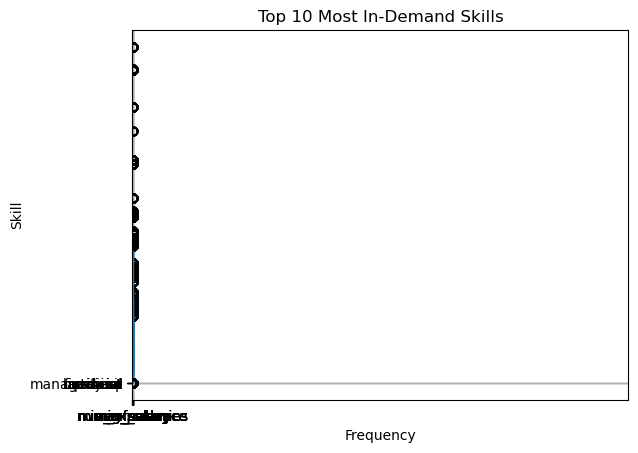

C:\Users\Selvakumar\AppData\Local\Temp\ipykernel_11252\3633892020.py:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


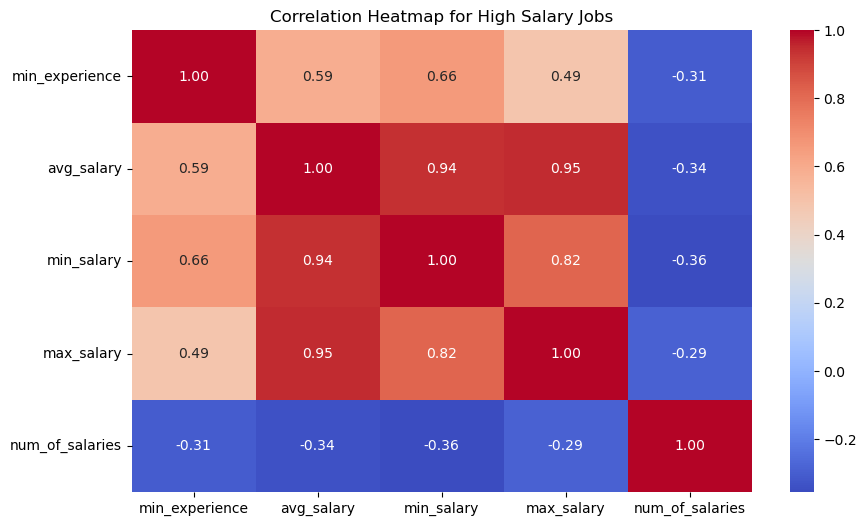

In [72]:
# Extract skills from job descriptions
from collections import Counter
all_skills = ' '.join(merged_df['Skills/Description']).lower().split()
# Filter out common words and symbols
common_words = ['and', 'the', 'with', 'experience', 'skills', 'ability', 'etc','data','big','computer']
filtered_skills = [word for word in all_skills if word.isalpha() and word not in common_words]
# Count the frequency of each skill
skills_counter = Counter(filtered_skills)
# Plot top N most common skills
top_n = 10
top_skills = dict(skills_counter.most_common(top_n))
plt.barh(list(top_skills.keys()), list(top_skills.values()), color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.title(f'Top {top_n} Most In-Demand Skills')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for High Salary Jobs")
plt.show()

Summary Statistics for rich_df:
       min_experience    avg_salary    min_salary    max_salary  \
count       93.000000  9.300000e+01  9.300000e+01  9.300000e+01   
mean         6.322581  7.153333e+06  4.143441e+06  9.540860e+06   
std          0.968653  7.792908e+05  9.945072e+05  3.343509e+05   
min          5.000000  5.060000e+06  2.340000e+06  9.300000e+06   
25%          5.000000  6.630000e+06  3.450000e+06  9.300000e+06   
50%          7.000000  6.630000e+06  3.450000e+06  9.300000e+06   
75%          7.000000  8.200000e+06  5.500000e+06  1.000000e+07   
max          8.000000  8.200000e+06  5.500000e+06  1.000000e+07   

       num_of_salaries  
count        93.000000  
mean          4.989247  
std           0.103695  
min           4.000000  
25%           5.000000  
50%           5.000000  
75%           5.000000  
max           5.000000  


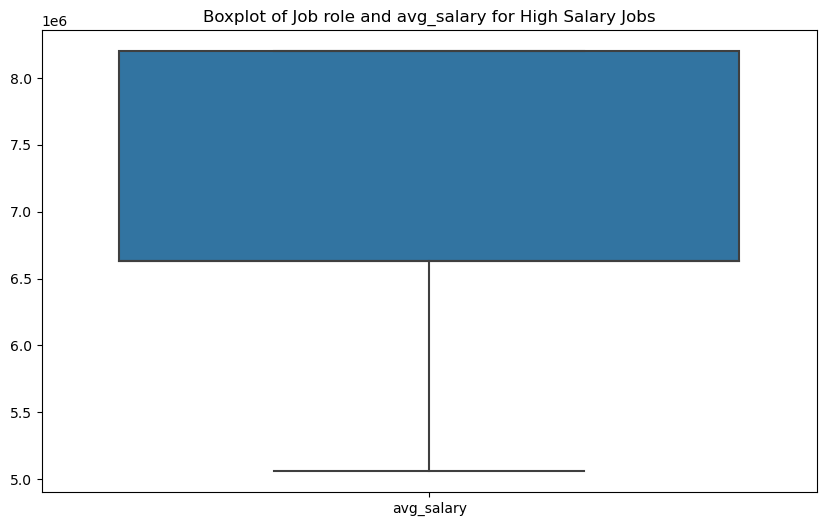

C:\Users\Selvakumar\AppData\Local\Temp\ipykernel_11252\359555268.py:18: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(rich_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


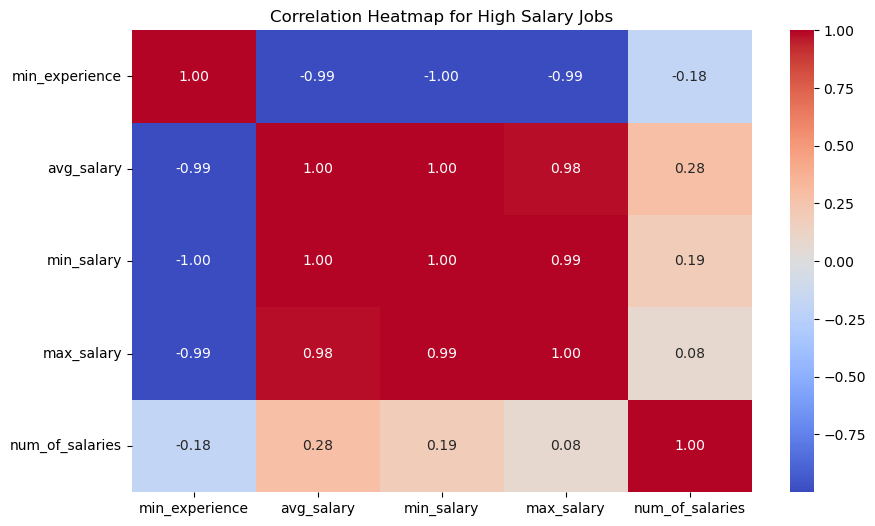

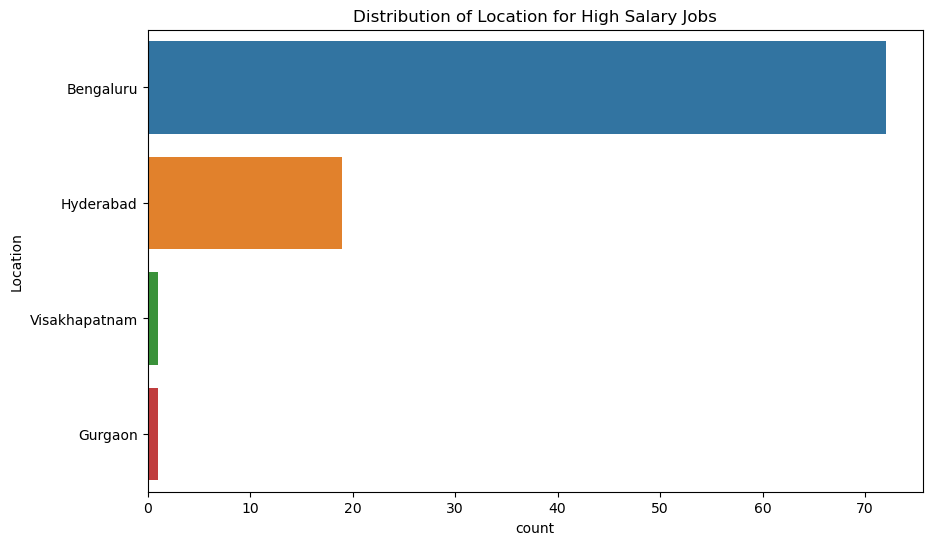

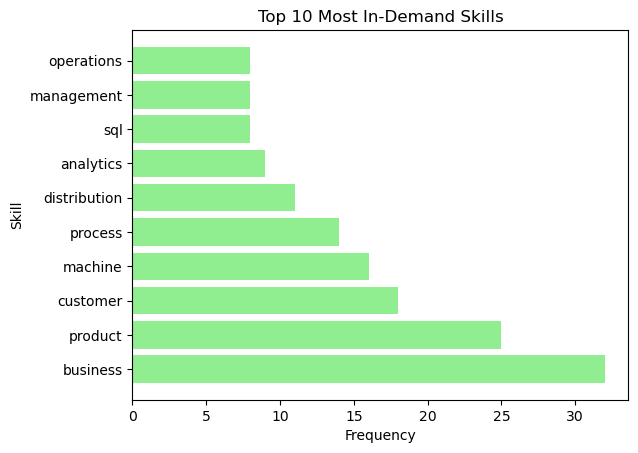

In [73]:
#skills that the highest salaried data science professionals have

rich_df =merged_df[merged_df['avg_salary'] > 5000000]

# Summary statistics
summary_stats = rich_df.describe()
print("Summary Statistics for rich_df:")
print(summary_stats)

# Distribution of 'job role' and 'avg_salary'
plt.figure(figsize=(10, 6))
sns.boxplot(data=rich_df[['Job_Role', 'avg_salary']])
plt.title("Boxplot of Job role and avg_salary for High Salary Jobs")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rich_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for High Salary Jobs")
plt.show()

# Visualize distribution of 'Location'
plt.figure(figsize=(10, 6))
sns.countplot(y='Location', data=rich_df, order=rich_df['Location'].value_counts().index)
plt.title("Distribution of Location for High Salary Jobs")
plt.show()

from collections import Counter
all_skills = ' '.join(rich_df['Skills/Description']).lower().split()
# Filter out common words and symbols
common_words = ['and', 'the', 'with', 'experience', 'skills', 'ability', 'etc','data','big','computer']
filtered_skills = [word for word in all_skills if word.isalpha() and word not in common_words]
# Count the frequency of each skill
skills_counter = Counter(filtered_skills)
# Plot top N most common skills
top_n = 10
top_skills = dict(skills_counter.most_common(top_n))
plt.barh(list(top_skills.keys()), list(top_skills.values()), color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.title(f'Top {top_n} Most In-Demand Skills')
plt.show()

In [74]:
#info of dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18806 entries, 0 to 18805
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job_Role            18806 non-null  object 
 1   Company             18806 non-null  object 
 2   Location            18806 non-null  object 
 3   Job Experience      18806 non-null  object 
 4   Skills/Description  18806 non-null  object 
 5   job_title           18806 non-null  object 
 6   min_experience      18806 non-null  int64  
 7   avg_salary          18806 non-null  float64
 8   min_salary          18806 non-null  float64
 9   max_salary          18806 non-null  float64
 10  num_of_salaries     18806 non-null  int64  
dtypes: float64(3), int64(2), object(6)
memory usage: 1.6+ MB


In [75]:
#decribing the entire dataset
merged_df.describe(include='all')

,Job_Role,Company,Location,Job Experience,Skills/Description,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
count,18806,18806,18806,18806,18806,18806,18806.000000,1.880600e+04,1.880600e+04,1.880600e+04,18806.000000
unique,1396,162,29,94,2298,10,NaN,NaN,NaN,NaN,NaN
top,Data Engineer: Data Integration,Accenture,Bengaluru,05-Aug,"deep learning, NLP, machine learning, R, Torch...",Data Engineer,NaN,NaN,NaN,NaN,NaN
freq,750,4920,7461,2149,90,2099,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,3.036584,1.387190e+06,8.151473e+05,2.150297e+06,236.147612
std,NaN,NaN,NaN,NaN,NaN,NaN,2.312019,8.129359e+05,5.779238e+05,1.066917e+06,406.241321
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,2.500000e+05,2.000000e+04,3.500000e+05,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,8.600000e+05,4.500000e+05,1.500000e+06,25.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.190000e+06,5.800000e+05,1.900000e+06,61.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.740000e+06,1.050000e+06,2.500000e+06,225.000000


Skewness of each feature:
min_experience     1.932904
avg_salary         2.569119
min_salary         2.337046
max_salary         2.745180
num_of_salaries    2.618532
dtype: float64

Interpretation:
The feature 'min_experience' is highly right-skewed.
The feature 'avg_salary' is highly right-skewed.
The feature 'min_salary' is highly right-skewed.
The feature 'max_salary' is highly right-skewed.
The feature 'num_of_salaries' is highly right-skewed.


C:\Users\Selvakumar\AppData\Local\Temp\ipykernel_11252\318297067.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = merged_df.skew()


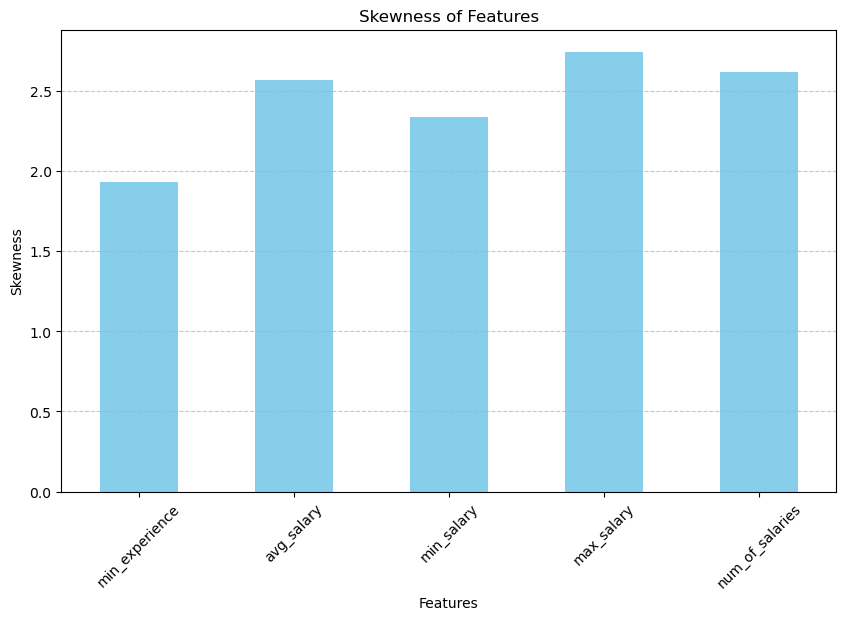

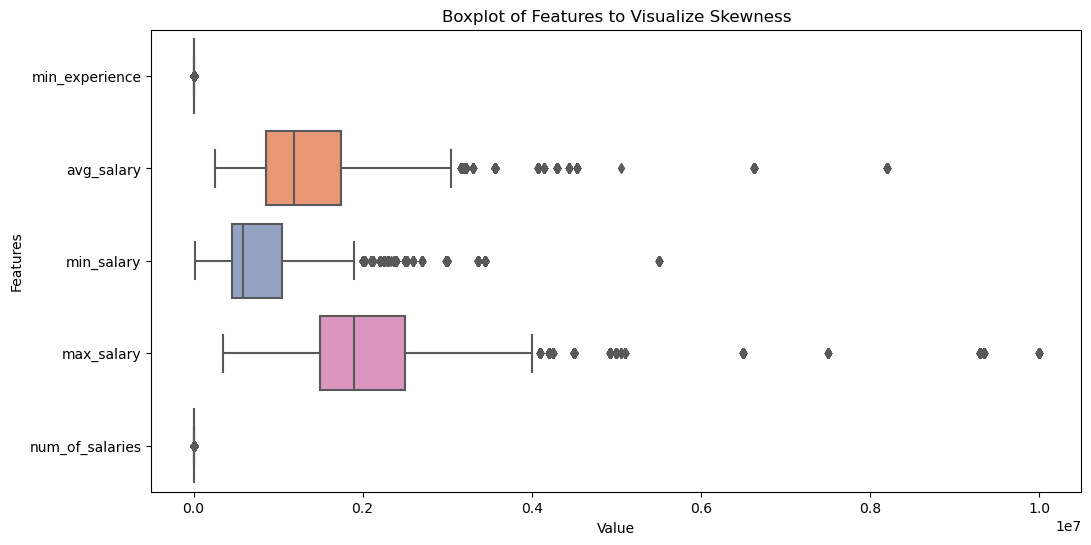

In [76]:
# Calculate skewness of each feature
skewness = merged_df.skew()

# Print skewness values
print("Skewness of each feature:")
print(skewness)

# Interpretation
print("\nInterpretation:")
for column, skew in skewness.items():
    if skew < -1:
        print(f"The feature '{column}' is highly left-skewed.")
    elif -1 <= skew < -0.5:
        print(f"The feature '{column}' is moderately left-skewed.")
    elif -0.5 <= skew <= 0.5:
        print(f"The feature '{column}' is approximately symmetric.")
    elif 0.5 < skew < 1:
        print(f"The feature '{column}' is moderately right-skewed.")
    else:
        print(f"The feature '{column}' is highly right-skewed.")

# Plot skewness values
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', color='skyblue')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plotting boxplot to visualize skewness
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, orient="h", palette="Set2")
plt.title('Boxplot of Features to Visualize Skewness')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

In [77]:
# Count the number of companies
num_companies = merged_df['Company'].nunique()
print("Number of unique companies:", num_companies)

# Perform descriptive statistics on each company
company_stats = merged_df.groupby('Company')['avg_salary'].describe()
print("Descriptive statistics for each company:")
print(company_stats)

Number of unique companies: 162
Descriptive statistics for each company:
                     count       mean            std        min        25%  \
Company                                                                      
ACL Digital            2.0  1880000.0       0.000000  1880000.0  1880000.0   
Accenture           4920.0  1219000.0  551317.312093   520000.0   900000.0   
Accolite Digital      16.0  1365000.0   87787.622514  1280000.0  1280000.0   
Adidas                18.0  2300000.0       0.000000  2300000.0  2300000.0   
Advance Auto Parts    28.0  1950000.0  631377.095749  1330000.0  1330000.0   
...                    ...        ...            ...        ...        ...   
Wolters Kluwer        48.0  1810000.0  565926.090957  1250000.0  1250000.0   
Xceedance              8.0  1340000.0       0.000000  1340000.0  1340000.0   
Xoriant               21.0  1550000.0  372384.210192  1040000.0  1040000.0   
eClerx               276.0   655000.0  446595.607192   250000.0   370

In [78]:
# Display companies and salaries recorded
company_counts = merged_df['Company'].value_counts()
print("Companies and the number of rows they have:")
print(company_counts)


Companies and the number of rows they have:
Accenture                4920
IBM                      3170
Genpact                   920
DXC Technology            610
Shell                     603
                         ... 
Mobile Premier League       1
phData                      1
Blackhawk Network           1
Care Health Insurance       1
Anju Software               1
Name: Company, Length: 162, dtype: int64


Descriptive statistics for the top 5 companies:
        Job_Count  Average_Salary
count     5.00000    5.000000e+00
mean   2044.60000    1.415633e+06
std    1932.32135    4.422655e+05
min     603.00000    1.146000e+06
25%     610.00000    1.182500e+06
50%     920.00000    1.219000e+06
75%    3170.00000    1.334000e+06
max    4920.00000    2.196667e+06


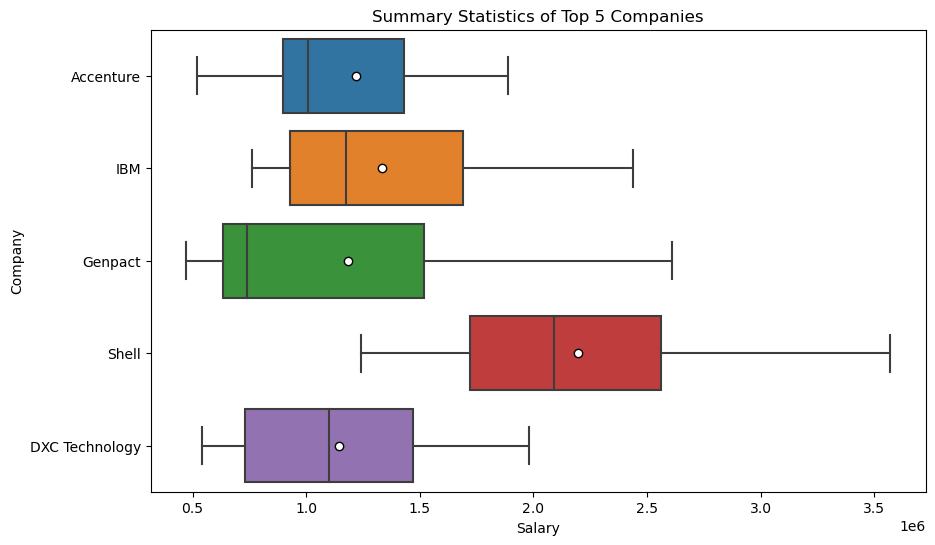

In [79]:
# 5 number summary for top 5 companies
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Company' and calculate the count of job listings and average salary
company_stats = merged_df.groupby('Company').agg({
    'job_title': 'count',
    'avg_salary': 'mean'
})

# Rename columns for clarity
company_stats = company_stats.rename(columns={'job_title': 'Job_Count', 'avg_salary': 'Average_Salary'})

# Sort companies based on job count and average salary
company_stats_sorted = company_stats.sort_values(by=['Job_Count', 'Average_Salary'], ascending=[False, False])

# Select top 5 companies
top_5_companies = company_stats_sorted.head(5)

# Display descriptive statistics for the top 5 companies
print("Descriptive statistics for the top 5 companies:")
print(top_5_companies.describe())

# Plotting parameters
plt.figure(figsize=(10, 6))

# Box plot with mean, median, mode, max, min
sns.boxplot(data=merged_df[merged_df['Company'].isin(top_5_companies.index)], x='avg_salary', y='Company', orient='h', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=False)

# Add labels
plt.xlabel('Salary')
plt.ylabel('Company')
plt.title('Summary Statistics of Top 5 Companies')

# Display the plot
plt.show()


Descriptive statistics for the top 5 companies:
        Job_Count  Average_Salary
count    5.000000    5.000000e+00
mean   119.000000    3.108333e+06
std    152.548353    1.752300e+05
min      2.000000    2.866667e+06
25%     11.000000    3.040000e+06
50%     42.000000    3.090000e+06
75%    180.000000    3.220000e+06
max    360.000000    3.325000e+06


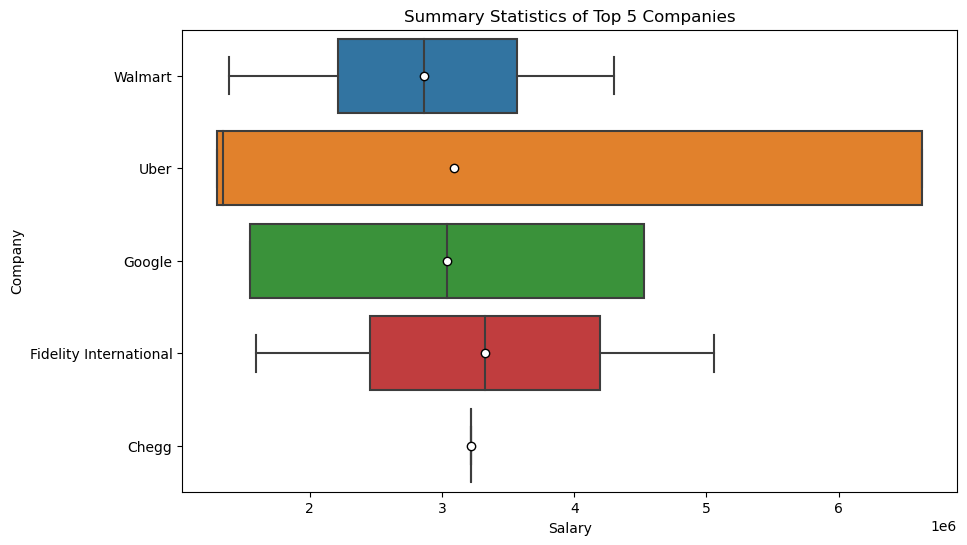

In [80]:
# 5 number summary for top 5 companies
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Company' and calculate the count of job listings and average salary
company_stats = merged_df.groupby('Company').agg({
    'job_title': 'count',
    'avg_salary': 'mean'
})

# Rename columns for clarity
company_stats = company_stats.rename(columns={'job_title': 'Job_Count', 'avg_salary': 'Average_Salary'})

# Sort companies based on job count and average salary
company_stats_sorted = company_stats.sort_values(by=[ 'Average_Salary'], ascending=[ False])

# Select top 5 companies
top_5_companies = company_stats_sorted.head(5)

# Display descriptive statistics for the top 5 companies
print("Descriptive statistics for the top 5 companies:")
print(top_5_companies.describe())

# Plotting parameters
plt.figure(figsize=(10, 6))

# Box plot with mean, median, mode, max, min
sns.boxplot(data=merged_df[merged_df['Company'].isin(top_5_companies.index)], x='avg_salary', y='Company', orient='h', showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=False)

# Add labels
plt.xlabel('Salary')
plt.ylabel('Company')
plt.title('Summary Statistics of Top 5 Companies')

# Display the plot
plt.show()


In [81]:
from collections import Counter

# Count the frequency of each job title
job_title_counts = Counter(merged_df['job_title'].astype(str).str.lower())

# Extract the top 5 most common job titles
top_5_job_titles = job_title_counts.most_common(5)

# Print the top 5 most common job titles
print("Top 5 most common job titles:")
for job_title, count in top_5_job_titles:
    print(f"{job_title}: {count}")

    
    
# Filter job titles
job_titles = ['Senior Data Scientist', 'Data Analyst', 'Data Engineer', 'Senior Data Engineer', 'Senior Data Analyst']


for title in job_titles:
    filtered_jobs = merged_df[merged_df['job_title'] == title]
    print(f"Job Title: {title}")
    print("---------------------")
    for index, row in filtered_jobs.head(1).iterrows():
        print("Job Description:")
        print(row['Skills/Description'])
        print("---------------------")


Top 5 most common job titles:
data engineer: 2099
senior data scientist: 2075
data analyst: 2050
senior business analyst: 2038
data scientist: 2028
Job Title: Senior Data Scientist
---------------------
Job Description:
Data Science, Machine learning, Python, Azure, BiqQuery, GCP, PySpark, tensorflow
---------------------
Job Title: Data Analyst
---------------------
Job Description:
Data Science, Machine learning, Python, Azure, BiqQuery, GCP, PySpark, tensorflow
---------------------
Job Title: Data Engineer
---------------------
Job Description:
Data Science, Machine learning, Python, Azure, BiqQuery, GCP, PySpark, tensorflow
---------------------
Job Title: Senior Data Engineer
---------------------
Job Description:
Data Science, Machine learning, Python, Azure, BiqQuery, GCP, PySpark, tensorflow
---------------------
Job Title: Senior Data Analyst
---------------------
Job Description:
Data Science, Machine learning, Python, Azure, BiqQuery, GCP, PySpark, tensorflow
--------------

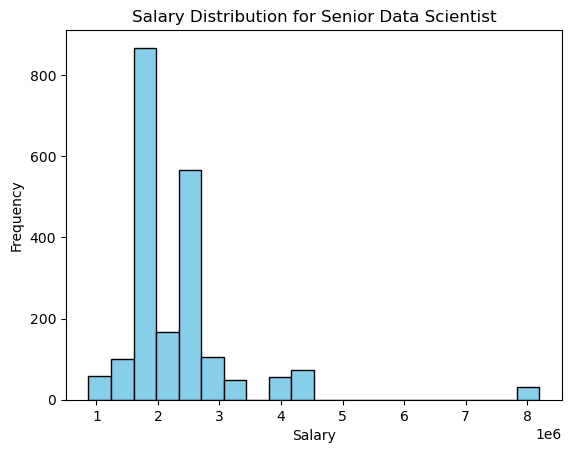

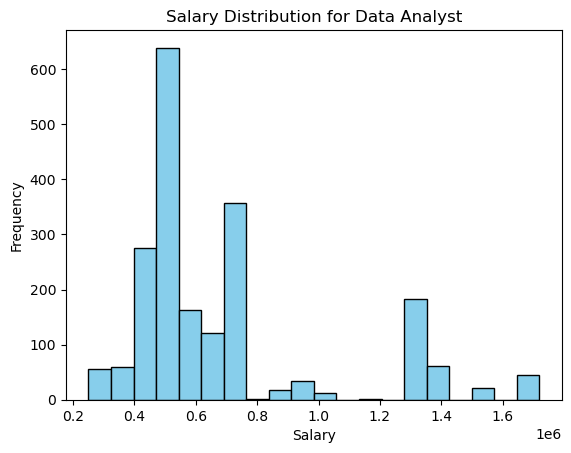

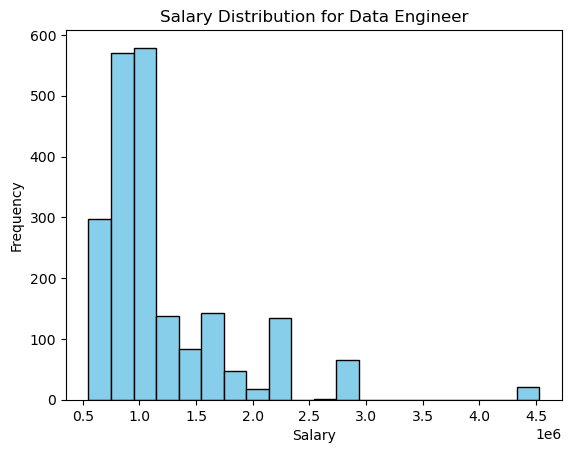

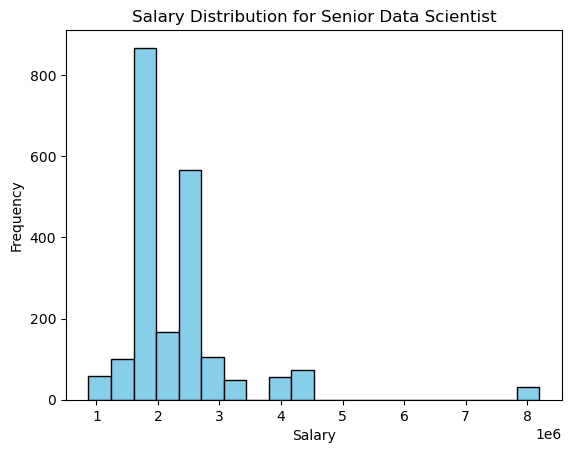

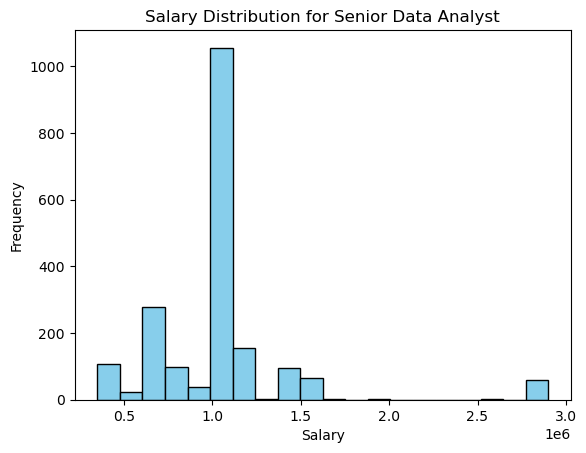

In [82]:
# Plot salary distribution for a specific job title
job_title = 'Senior Data Scientist'
salary_data = merged_df[merged_df['job_title'] == job_title]['avg_salary']
plt.hist(salary_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title(f'Salary Distribution for {job_title}')
plt.show()

# Plot salary distribution for a specific job title
job_title = 'Data Analyst'
salary_data = merged_df[merged_df['job_title'] == job_title]['avg_salary']
plt.hist(salary_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title(f'Salary Distribution for {job_title}')
plt.show()


# Plot salary distribution for a specific job title
job_title = 'Data Engineer'
salary_data = merged_df[merged_df['job_title'] == job_title]['avg_salary']
plt.hist(salary_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title(f'Salary Distribution for {job_title}')
plt.show()


# Plot salary distribution for a specific job title
job_title = 'Senior Data Scientist'
salary_data = merged_df[merged_df['job_title'] == job_title]['avg_salary']
plt.hist(salary_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title(f'Salary Distribution for {job_title}')
plt.show()

# Plot salary distribution for a specific job title
job_title = 'Senior Data Analyst'
salary_data = merged_df[merged_df['job_title'] == job_title]['avg_salary']
plt.hist(salary_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title(f'Salary Distribution for {job_title}')
plt.show()


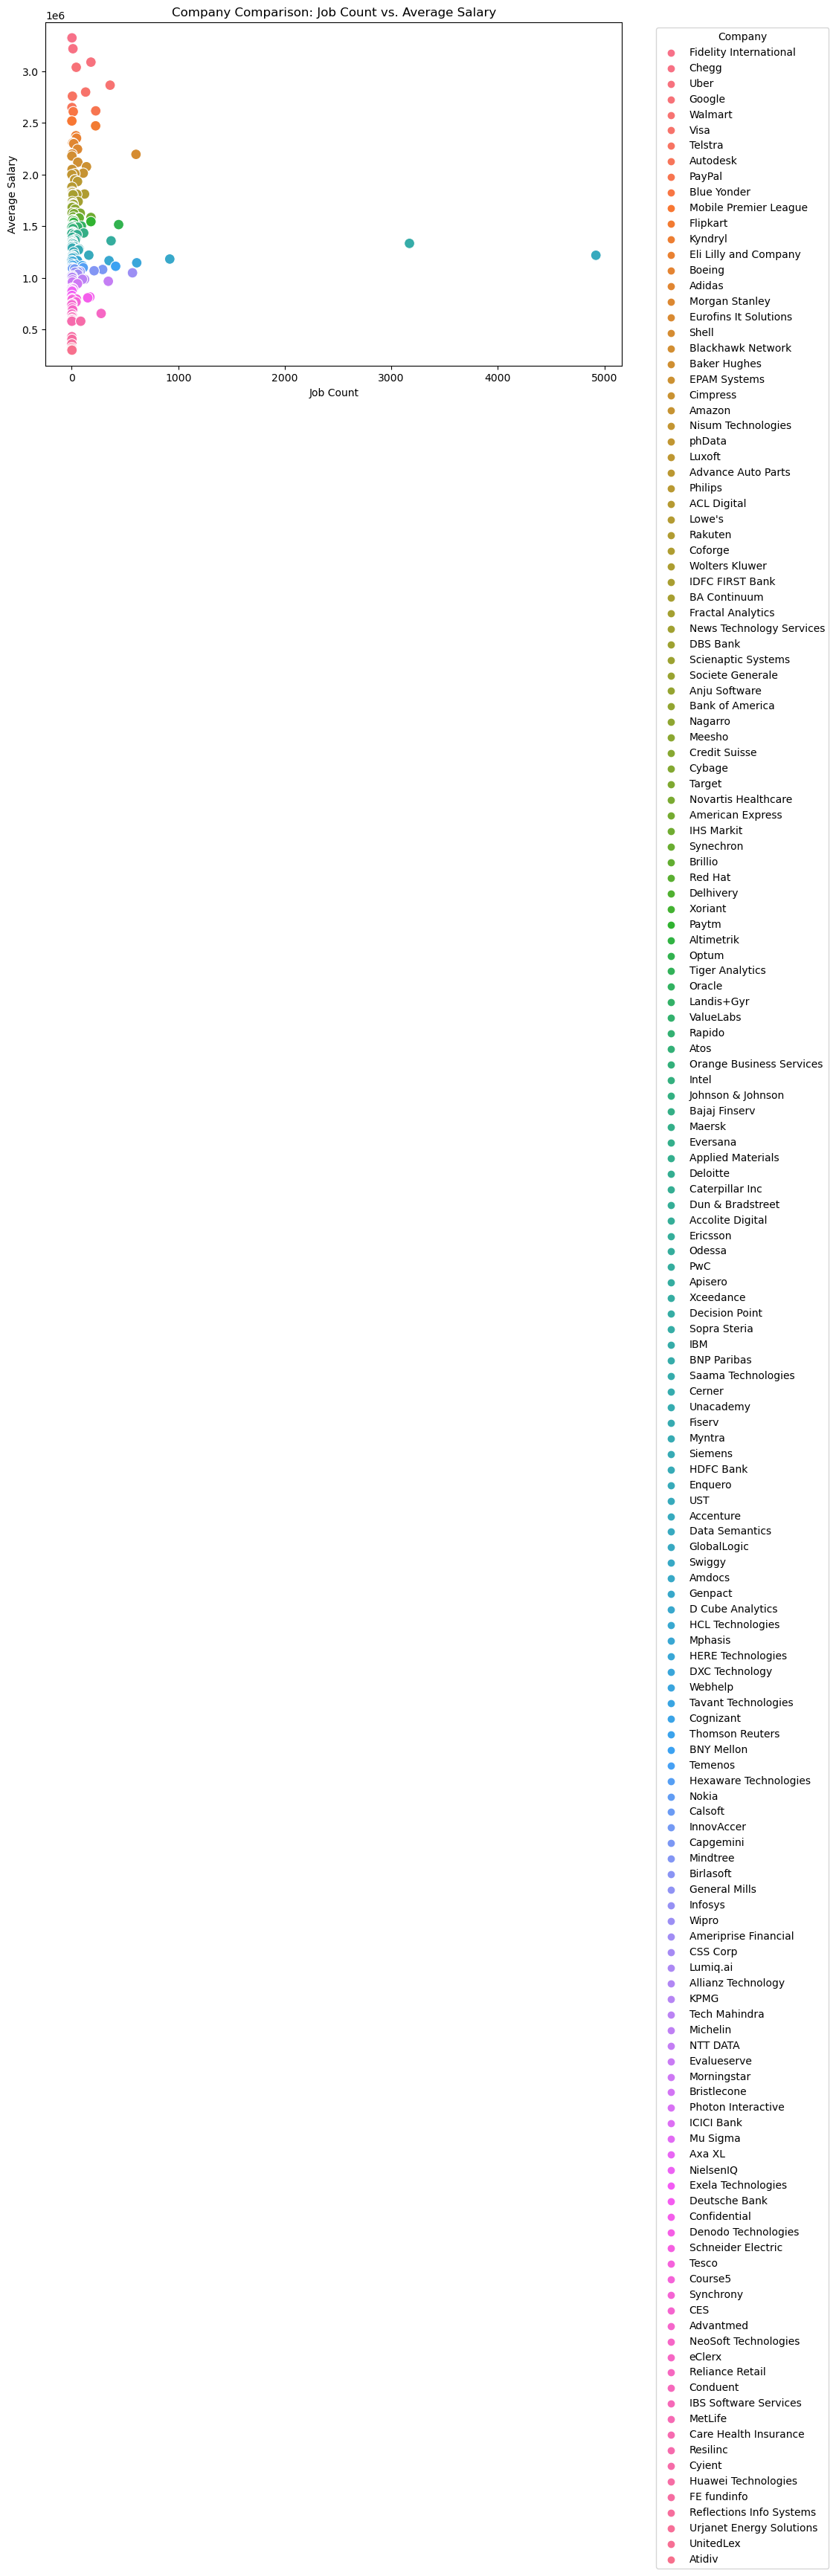

In [83]:
# Plot average salary and job count for each company
plt.figure(figsize=(10, 6))
sns.scatterplot(data=company_stats_sorted, x='Job_Count', y='Average_Salary', hue=company_stats_sorted.index, s=100)
plt.xlabel('Job Count')
plt.ylabel('Average Salary')
plt.title('Company Comparison: Job Count vs. Average Salary')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

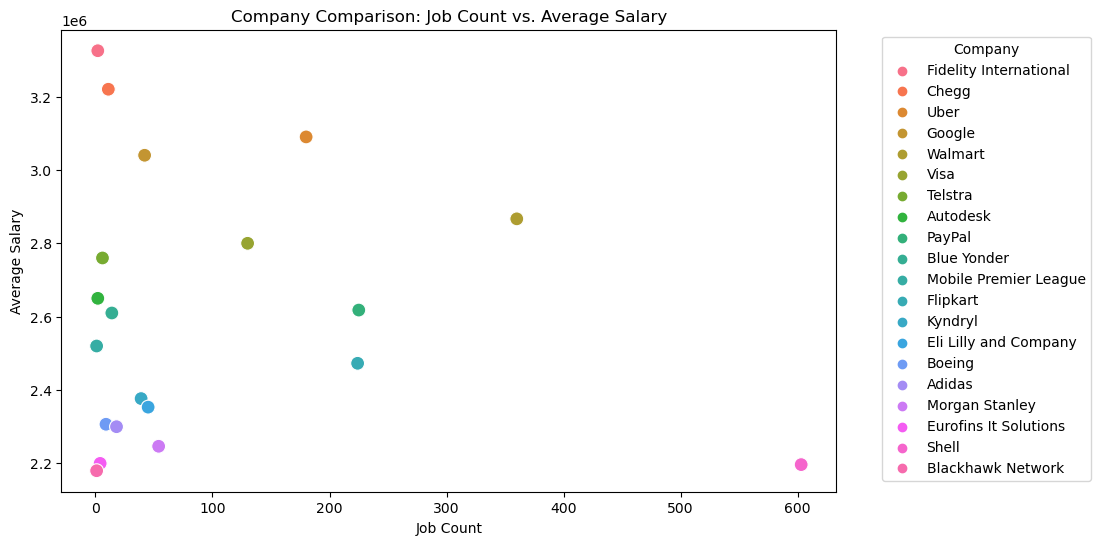

In [84]:
# Filter the top 20 companies
top_20_companies = company_stats_sorted.head(20)

# Plot average salary and job count for each company
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_20_companies, x='Job_Count', y='Average_Salary', hue=top_20_companies.index, s=100)
plt.xlabel('Job Count')
plt.ylabel('Average Salary')
plt.title('Company Comparison: Job Count vs. Average Salary')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


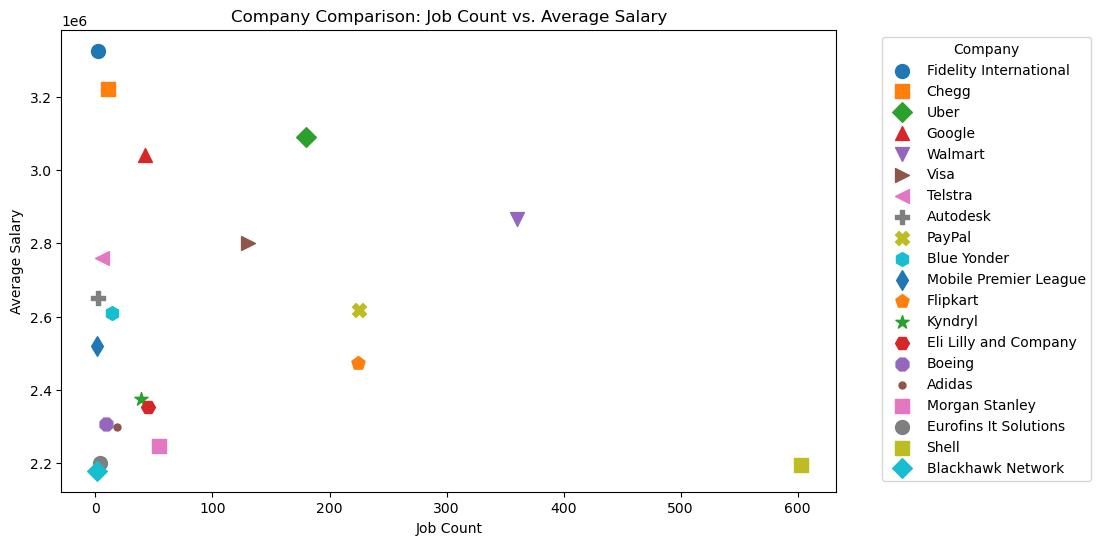

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a list of marker shapes to use
marker_shapes = ['o', 's', 'D', '^', 'v', '>', '<', 'P', 'X', 'h', 'd', 'p', '*', 'H', '8', '.', ',']

# Filter the top 20 companies
top_20_companies = company_stats_sorted.head(20)

# Plot average salary and job count for each company
plt.figure(figsize=(10, 6))
for i, (company, data) in enumerate(top_20_companies.iterrows()):
    plt.scatter(data['Job_Count'], data['Average_Salary'], label=company, s=100, marker=marker_shapes[i % len(marker_shapes)])

plt.xlabel('Job Count')
plt.ylabel('Average Salary')
plt.title('Company Comparison: Job Count vs. Average Salary')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


C:\Users\Selvakumar\AppData\Local\Temp\ipykernel_11252\3334688607.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=location_salary, x='Location', y='avg_salary', ci=None)


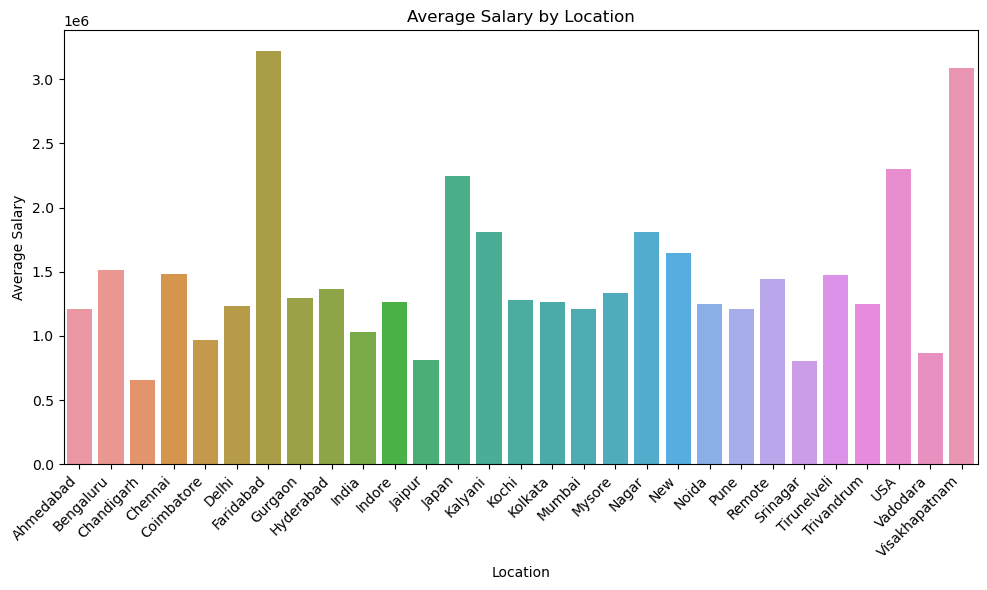

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Group by location and calculate the mean salary for each location
location_salary = merged_df.groupby(merged_df['Location'].str.split().str[0])['avg_salary'].mean().reset_index()

# Plot average salary by location
plt.figure(figsize=(10, 6))
sns.barplot(data=location_salary, x='Location', y='avg_salary', ci=None)
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.title('Average Salary by Location')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


In [87]:

merged_df


,Job_Role,Company,Location,Job Experience,Skills/Description,job_title,min_experience,avg_salary,min_salary,max_salary,num_of_salaries
0,Senior Data Scientist,Walmart,Bengaluru,05-Sep,"Data Science, Machine learning, Python, Azure,...",Data Scientist,2,2830000.0,1780000.0,4100000.0,85
1,Senior Data Scientist,Walmart,Bengaluru,05-Sep,"Data Science, Machine learning, Python, Azure,...",Data Analyst,1,1390000.0,380000.0,3000000.0,81
2,Senior Data Scientist,Walmart,Bengaluru,05-Sep,"Data Science, Machine learning, Python, Azure,...",Data Engineer,3,2210000.0,1500000.0,3190000.0,88
3,Senior Data Scientist,Walmart,Bengaluru,05-Sep,"Data Science, Machine learning, Python, Azure,...",Senior Data Scientist,5,4300000.0,3000000.0,6500000.0,32
4,Senior Data Scientist,Walmart,Bengaluru,05-Sep,"Data Science, Machine learning, Python, Azure,...",Senior Data Analyst,4,2900000.0,1650000.0,4000000.0,32
...,...,...,...,...,...,...,...,...,...,...,...
18801,Job Opening with Cognizant - Skill : DevOPs GC...,Cognizant,Chennai,06-Oct,"IT Skills, Java, Python, Software Development,...",Data Architect,10,1960000.0,1500000.0,2550000.0,42
18802,Associate Product Architect - Bigdata,D Cube Analytics,Bengaluru,Aug-13,"Unix, Computer science, GIT, Linux, Pharma, Sh...",Senior Business Analyst,2,1170000.0,920000.0,1400000.0,35
18803,Tech Recruiter,Atidiv,Pune,02-May,"Networking, data science, Social media, Data P...",Business Analyst,1,300000.0,220000.0,400000.0,40
18804,Tech Recruiter,Atidiv,Bengaluru,02-May,"Networking, data science, Social media, Data P...",Business Analyst,1,300000.0,220000.0,400000.0,40


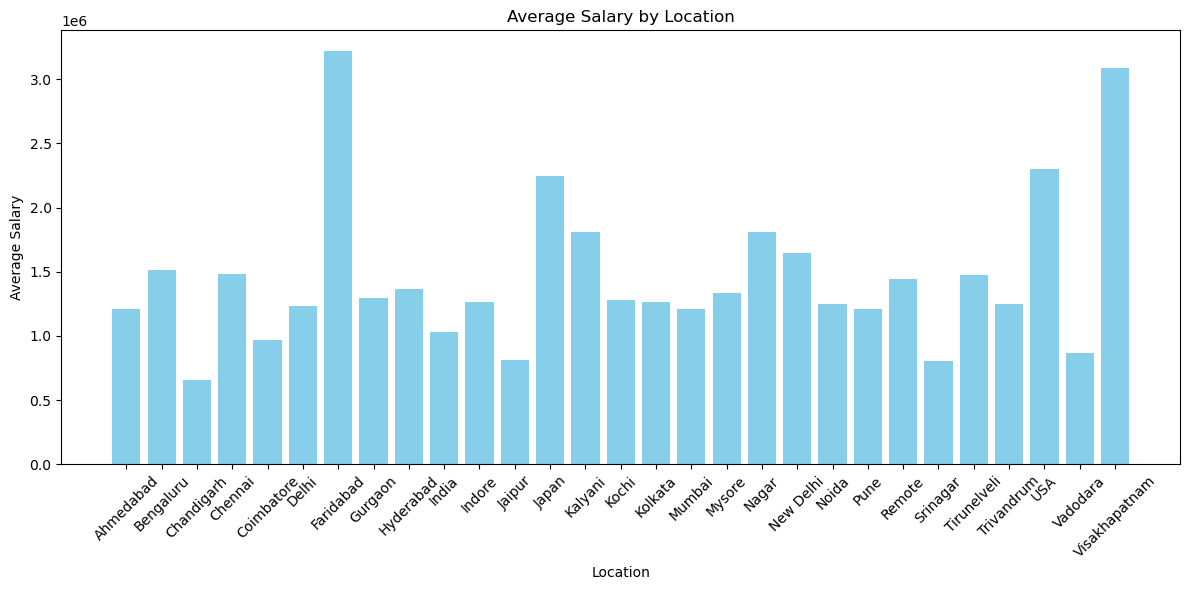

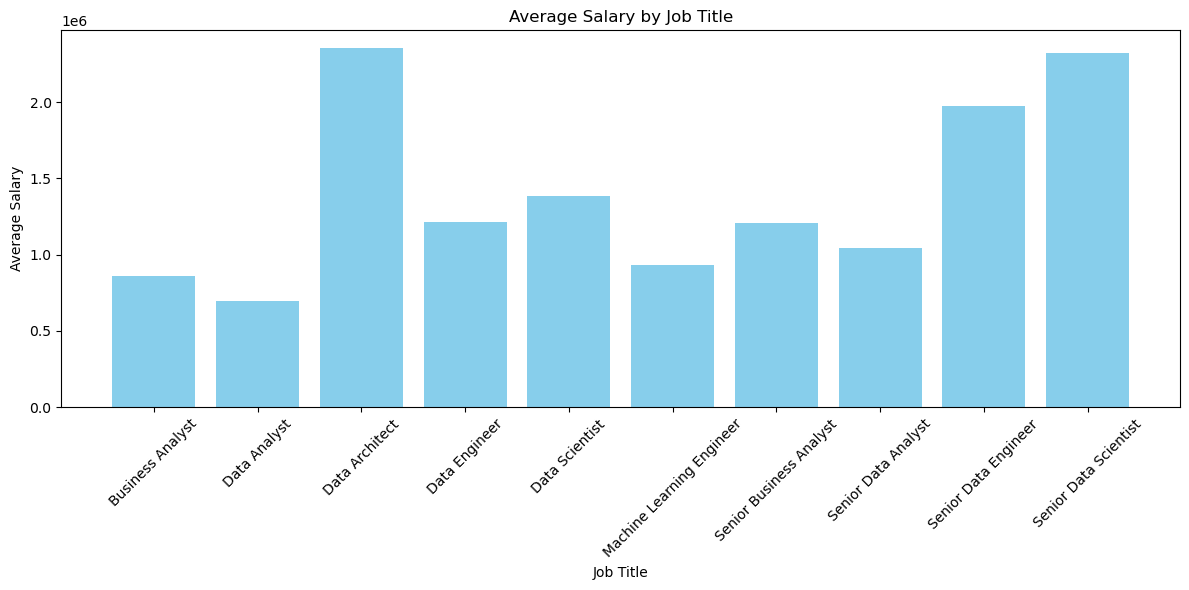

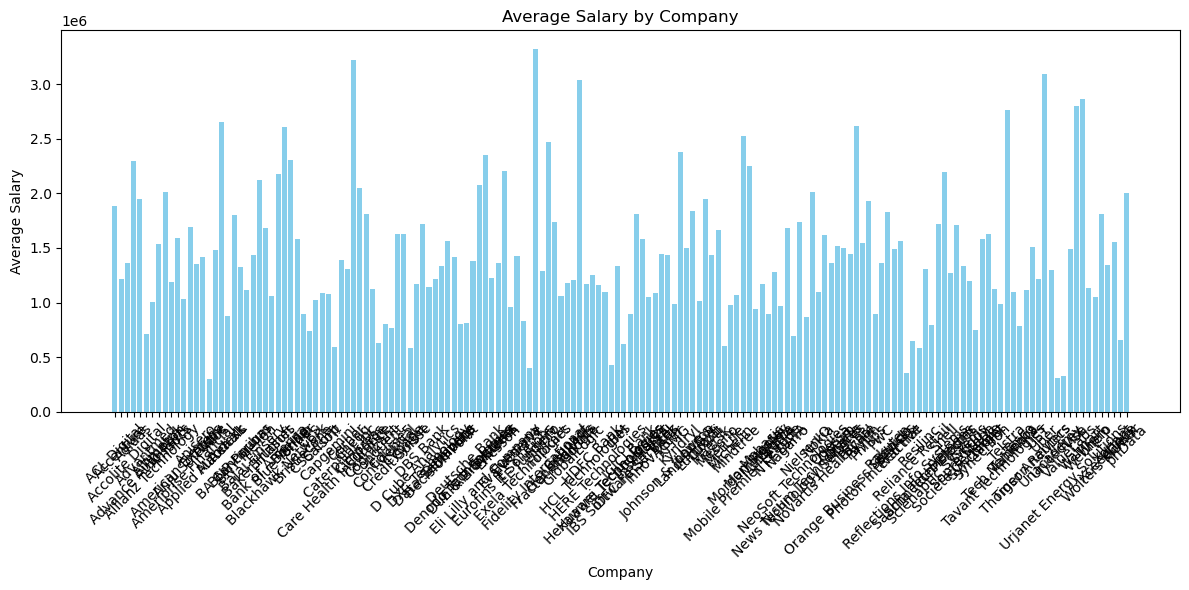

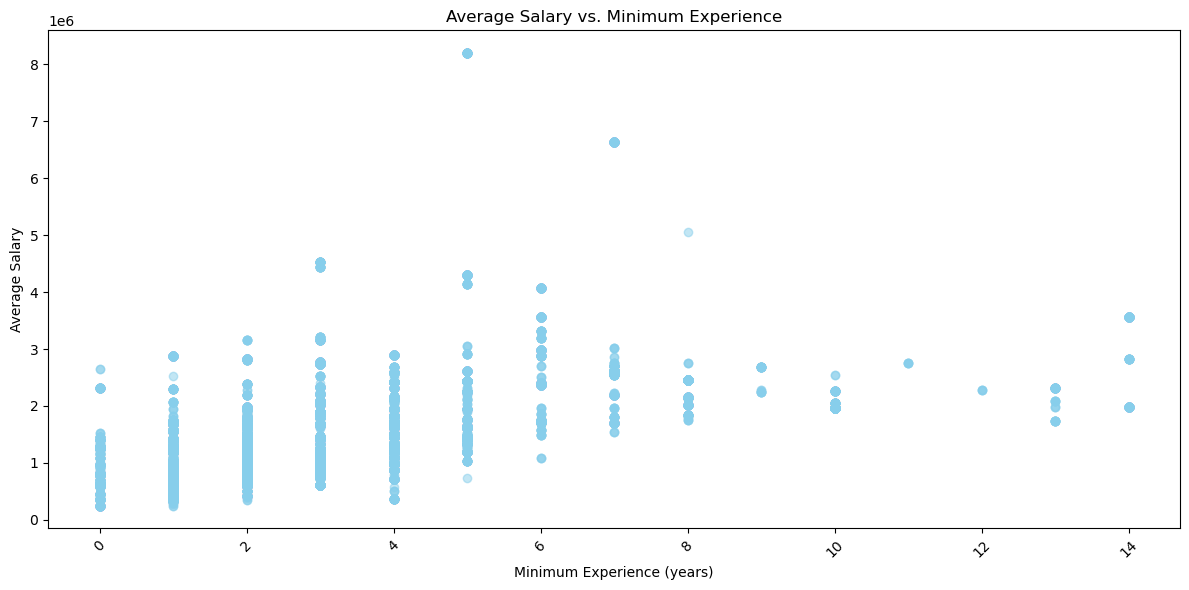

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


sal_vs_loc= merged_df.groupby('Location').aggregate({"avg_salary": "mean"})
sal_vs_loc.reset_index(inplace=True)
sal_vs_loc = sal_vs_loc.rename(columns={'Location': 'location'})


# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sal_vs_loc['location'], sal_vs_loc['avg_salary'], color='skyblue')
plt.title('Average Salary by Location')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouping by Job Title and calculating average salary
sal_vs_jobtitle = merged_df.groupby('job_title').aggregate({"avg_salary": "mean"})
sal_vs_jobtitle.reset_index(inplace=True)
sal_vs_jobtitle = sal_vs_jobtitle.rename(columns={'job_title': 'job_title'})

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sal_vs_jobtitle['job_title'], sal_vs_jobtitle['avg_salary'], color='skyblue')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Grouping by Company and calculating average salary
sal_vs_company = merged_df.groupby('Company').aggregate({"avg_salary": "mean"})
sal_vs_company.reset_index(inplace=True)
sal_vs_company = sal_vs_company.rename(columns={'Company': 'Company'})

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(sal_vs_company['Company'], sal_vs_company['avg_salary'], color='skyblue')
plt.title('Average Salary by Company')
plt.xlabel('Company')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['min_experience'], merged_df['avg_salary'], color='skyblue', alpha=0.5)
plt.title('Average Salary vs. Minimum Experience')
plt.xlabel('Minimum Experience (years)')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [89]:
# Check for missing values in categorical features


df= merged_df
merged_df["avg_salary"].fillna(df.avg_salary.mean(),inplace= True)

from scipy.stats import f_oneway, kendalltau

# Compute ANOVA F-value for each categorical feature
anova_scores = {}
for feature in ['Location', 'Company', 'job_title', 'Job_Role']:
    groups = [df[df[feature] == category]['avg_salary'].dropna() for category in df[feature].unique()]
    f_val, _ = f_oneway(*groups)
    anova_scores[feature] = f_val

# Compute Kendall’s rank correlation coefficient for each categorical feature
kendall_scores = {}
for feature in ['Location', 'Company', 'job_title', 'Job_Role']:
    non_nan_mask = df['avg_salary'].notna()
    tau, _ = kendalltau(df.loc[non_nan_mask, feature], df.loc[non_nan_mask, 'avg_salary'])
    kendall_scores[feature] = tau

# Print the scores
print("\nANOVA Scores:")
for feature, score in anova_scores.items():
    print(f"{feature}: {score}")

print("\nKendall's Rank Scores:")
for feature, score in kendall_scores.items():
    print(f"{feature}: {score}")

print("\nChosen features: company ,location, job title")



ANOVA Scores:
Location: 19.42212990138904
Company: 57.53516469436096
job_title: 1889.6459410731786
Job_Role: 5.094868960500031

Kendall's Rank Scores:
Location: -0.08960816646875512
Company: 0.11004451405338908
job_title: 0.35194423115034856
Job_Role: 0.03465665573914659

Chosen features: company ,location, job title


In [90]:
import pandas as pd
import scipy.stats as stats

# Compute Pearson correlation coefficient between 'min_experience' and 'avg_salary'
pearson_corr = merged_df['min_experience'].corr(merged_df['avg_salary'])

# Number of data points
n = len(merged_df)
print(n)


# Degrees of freedom
df = n - 2

t_statistic = (pearson_corr * np.sqrt(1 - pearson_corr ** 2)) / np.sqrt(n - 2)

# Two-tailed critical value for 95% confidence level
alpha = 0.05
critical_value = stats.t.ppf(1 - alpha/2, df)

print("Pearson's Correlation Coefficient:", pearson_corr)
print("t-statistic:", t_statistic)
print("Critical value from t-table:", critical_value)

# Compare t-statistic with critical value
if abs(t_statistic) > critical_value:
    print("Reject the null hypothesis: There is a significant correlation between min_experience and avg_salary.")
else:
    print("Fail to reject the null hypothesis: There is no significant correlation between min_experience and avg_salary.")


18806
Pearson's Correlation Coefficient: 0.5894049266027666
t-statistic: 0.003472264377367617
Critical value from t-table: 1.9600901503206587
Fail to reject the null hypothesis: There is no significant correlation between min_experience and avg_salary.


C:\Users\Selvakumar\AppData\Local\Temp\ipykernel_11252\2028423704.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


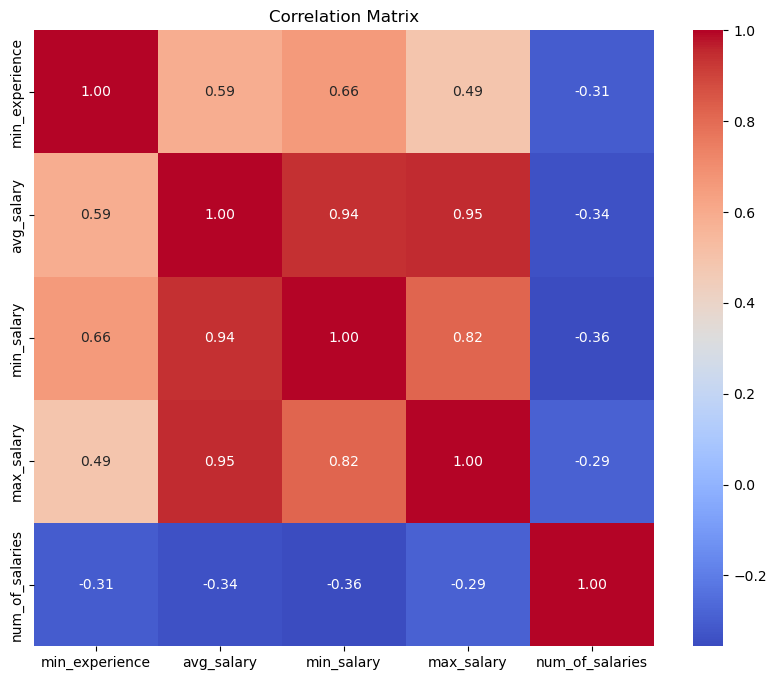

Mean Squared Error: 107051367541.85359


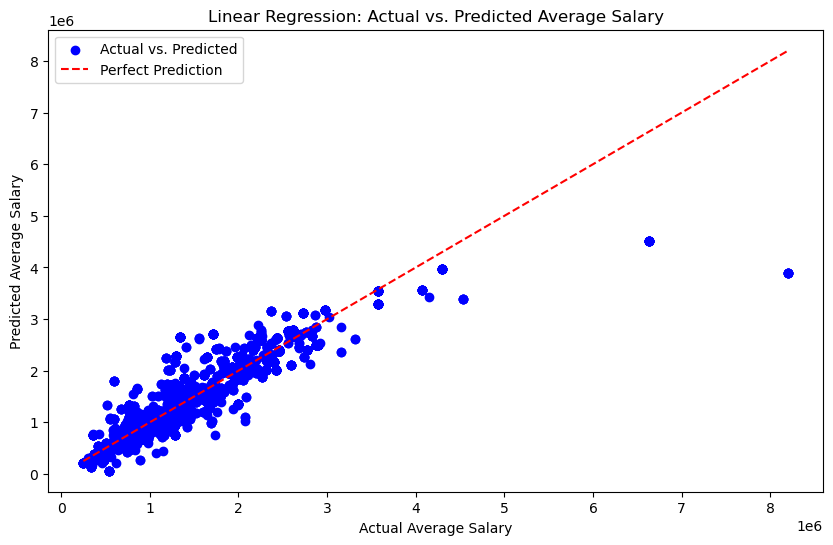

R^2 Score: 0.8305409806489766


In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

# Load the data from CSV file into a DataFrame
df = merged_df

# Drop rows with missing values in 'avg_salary'
df = df.dropna(subset=['avg_salary'])

# Correlation Analysis
correlation_matrix = df.corr()

# Visualize correlation matrix using heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Machine Learning Predictions
# Splitting data into features (X) and target variable (y)
X = df[['Location','Company','job_title','min_experience']]
y = df['avg_salary']

# One-hot encode the categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), [ 'Location','Company','job_title','min_experience'])
    ],
    remainder='passthrough'
)

# Define the pipeline including preprocessing and model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('imputer', SimpleImputer(strategy='mean')), 
    ('model', LinearRegression())
])

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the model using the pipeline
pipeline.fit(X_train, y_train)

# Making predictions
y_pred = pipeline.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Visualizing the model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Average Salary')
plt.ylabel('Predicted Average Salary')
plt.title('Linear Regression: Actual vs. Predicted Average Salary')
plt.legend()
plt.show()
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print('R^2 Score:', r2)



In [ ]:
import pandas as pd

# Collect user input
location = input("Enter location: ")
job_role = input("Enter job title: ")
company = input("Enter company: ")
experience = int(input("Enter years of experience: "))

# Create a DataFrame from user input
user_data = pd.DataFrame({'Location': [location], 'job_title': [job_role], 'Company': [company], 'min_experience': [experience]})

# Make prediction using the trained model
predicted_salary = pipeline.predict(user_data)

print(f"Predicted salary for {job_role} position with {experience} years of experience at {company} in {location}: {predicted_salary[0]}")



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

df= merged_df
company = input("Enter the company: ")
job_title = input("Enter the job title: ")
location = input("Enter the location: ")

# Create a DataFrame from user input
user_input = pd.DataFrame({'Company': [company], 'job_title': [job_title], 'Location': [location]})

# Splitting data into features (X) and target variable (y)
X = df[['Company', 'job_title', 'Location']]
y = df['avg_salary']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(handle_unknown='ignore'), ['Company', 'job_title', 'Location'])
    ],
    remainder='passthrough'
)

# Define the KNN model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor(n_neighbors=5))  # You can adjust the number of neighbors
])

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

# Make prediction for user input
predicted_salary = model.predict(user_input)
print('Predicted Salary:', predicted_salary[0])




In [ ]:
data = merged_df
data.columns

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Extract features from skills
vectorizer = CountVectorizer()
X_skills = vectorizer.fit_transform(data['Skills/Description'])
data['avg_salary'].fillna(merged_df['avg_salary'].mean())

# Define target variable
y = data['avg_salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_skills, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculate accuracy metrics
train_rmse = mean_squared_error(y_train, y_pred_train, squared=False)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Training RMSE:", train_rmse)
print("Testing RMSE:", test_rmse)
print("Training R2 score:", train_r2)
print("Testing R2 score:", test_r2)
